In [2]:
import os
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()

'C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average sentiment score for the drug  Tirzepatide is: -0.09888760330578512
Average sentiment score for the drug  Ozempic is: -0.1368664
Average sentiment score for the drug  Metformin is: -0.057370247933884295
Average sentiment score for the drug  Sitagliptin is: -0.2552280701754386
Average sentiment score for the drug  Mounjaro is: -0.09362222222222222


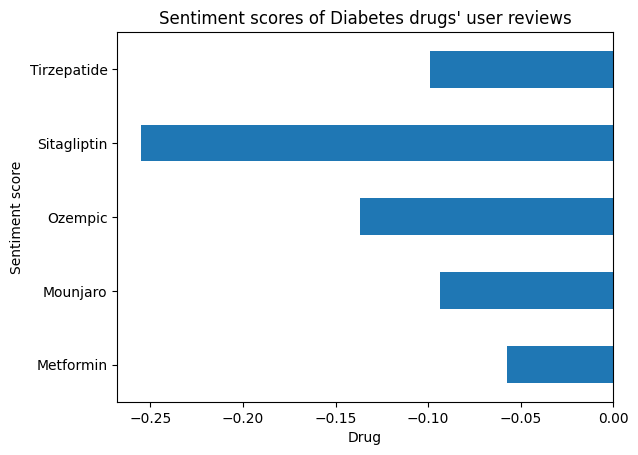

In [3]:
%run Sentiment_Analysis.ipynb

## LASSO

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


X = StandardScaler().fit_transform(data.iloc[:, :-1])

y = StandardScaler().fit_transform(data[['sentiment']])

def get_coefs(alpha,features,target):
    X = StandardScaler().fit_transform(data[features])
    y = StandardScaler().fit_transform(data[target])
    
    lasso_model =Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(y=y,X=X)
    
    coefs = lasso_model.coef_
    
    return coefs

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)



In [5]:
initial_words = list(data[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sentiment'])) for a in Alpha]

C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or cons

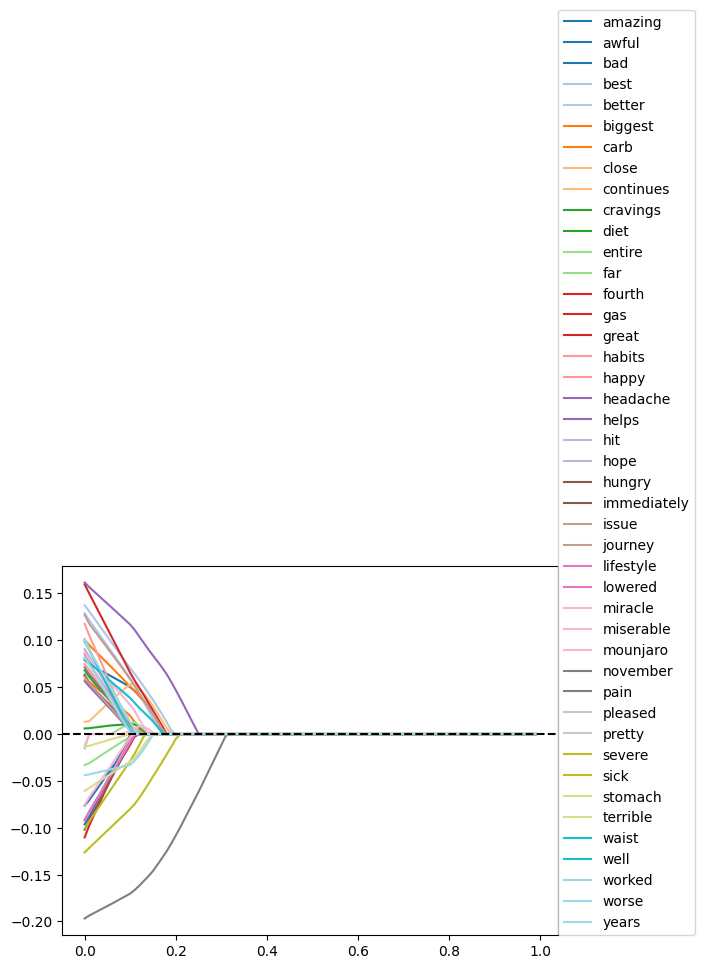

In [6]:

# Make a dataframe because its easier to plot
df_ = pd.DataFrame(out,columns=initial_words,index=Alpha)
                            #  word labels         alpha vals
# Plot it over alpha
df_.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
plt.legend(loc=(1,0)) # get the legend out of the way

In [7]:
Alpha = np.arange(0,.012,.0001)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)


C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and i

In [8]:
lasso_model.alpha_

0.010400000000000001

In [9]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)

Which were the most important?

Alot of them are very small, let's just look at ones that were more than .015 in either direction:

In [10]:
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])

In [11]:
final_coefs.sort_values(by='abs_', ascending=False)

,1,abs_
0,,
helps,0.154019,0.154019
great,0.146165,0.146165
pain,-0.127738,0.127738
positive,0.106165,0.106165
better,0.098519,0.098519
...,...,...
regurgitating,0.0,0.0
tissues,0.0,0.0
plunger,0.0,0.0


In [12]:
final_coefs[final_coefs['abs_']>.015].sort_values(by='abs_', ascending=False)

,1,abs_
0,,
helps,0.154019,0.154019
great,0.146165,0.146165
pain,-0.127738,0.127738
positive,0.106165,0.106165
better,0.098519,0.098519
...,...,...
ages,0.01563,0.01563
shaking,-0.015578,0.015578
healthy,0.015526,0.015526


## Most Postive Words

In [13]:
postive_words = final_coefs[final_coefs[1]>.015].sort_values(by=1, ascending=False)

In [14]:
positive_words = postive_words.index

In [15]:
len(positive_words)

103

## Most Negative Words

In [16]:
negative_words = final_coefs[final_coefs[1]<-0.015].sort_values(by=1, ascending=True)

In [17]:
negative_words = negative_words.index

In [18]:
len(negative_words)

101